In [ ]:
# import required packages/libraries
import pandas as pd
import numpy as np
# read data into dataframe
df =  pd.read_csv("../AR_Raw_Data/AR_Raw_Custom_Buckets_old.csv")
# set option to display all columns in a dataframe 
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', None)

# display first 5 rows in the dataframe
df.head()

In [32]:
df.rename(columns={
'trnsfr type':'Transfer_Type',
'proccode-grp procedure clas...':'Proc_Classification',
'rndrng prvdr':'Rendering_Provider',
'rndrng prvdrfullnme':'Physician',
'patient dprtmnt':'Patient_Dept',
'svc dprtmnt':'Service_Dept',
'svc dept bill name':'Service_Dept_Name',
'patientid':'Patient_ID',
'srvday':'Claim_Service_Day',
'claimid':'Claim_ID',
'agingasofdate':'Aging_Date',
'trnsfr intnt':'Transfer_Intent',
'trnsfr type':'Transfer Type',
'charge type':'Transaction Charge Type',
'primary clm cstm ins grpng':'Primary_Claim_Custom_Insurance_Grouping',
'primary clm ins pkg name':'Primary_Claim_Insurance_Package_Name',
 'srvbucket: <31': '1 -30 Days',
 'srvbucket: 31 - 60': '31 - 60 Days',
 'srvbucket: 61 - 90': '61 - 90 Days',
 'srvbucket: 91 - 180':'91 - 180 Days',
 'srvbucket: 181 - 365':'181 - 365 Days',
 'srvbucket: >365':'1+ Years',
 'srvbucket: Total': 'Total'
    },
    inplace=True)

In [33]:
df.head()

,Claim_ID,Claim_Service_Day,Service_Dept,Service_Dept_Name,Patient_ID,Primary_Claim_Custom_Insurance_Grouping,Primary_Claim_Insurance_Package_Name,Rendering_Provider,rndrng prvdr prvdr grp,Physician,Proc_Classification,Aging_Date,Transfer_Intent,Transfer Type,1 -30 Days,31 - 60 Days,61 - 90 Days,91 - 180 Days,181 - 365 Days,1+ Years,Total,Transaction Charge Type
0,117,1/2/2009,Lawrenceville,"Associated Retinal Consultants, LLC",404012,*MEDICARE B,Medicare-NJ (Medicare),RVNJ_DYarian,Retina Vitreous Center,"YARIAN, DAVID",Non-Drug,1/30/2009,Secondary,Secondary,0.0,0.0,0.0,0.0,0.0,147.66,147.66,TRANSFERIN
1,117,1/2/2009,Lawrenceville,"Associated Retinal Consultants, LLC",404012,*MEDICARE B,Medicare-NJ (Medicare),RVNJ_DYarian,Retina Vitreous Center,"YARIAN, DAVID",Non-Drug,2/10/2009,Secondary,Secondary,0.0,0.0,0.0,0.0,0.0,-147.66,-147.66,TRANSFERIN
2,117,1/2/2009,Lawrenceville,"Associated Retinal Consultants, LLC",404012,*MEDICARE B,Medicare-NJ (Medicare),RVNJ_DYarian,Retina Vitreous Center,"YARIAN, DAVID",Non-Drug,10/1/2010,Secondary,Secondary,0.0,0.0,0.0,0.0,0.0,0.00,0.00,TRANSFERIN
3,190,1/5/2009,Belleville,"Associated Retinal Consultants, LLC",377763,*MEDICARE B,Medicare-NJ (Medicare),RANJ_PHiggins,Retina Associates of New Jersey,"HIGGINS, PATRICK",Non-Drug,2/3/2009,Secondary,Secondary,0.0,0.0,0.0,0.0,0.0,188.04,188.04,TRANSFERIN
4,190,1/5/2009,Belleville,"Associated Retinal Consultants, LLC",377763,*MEDICARE B,Medicare-NJ (Medicare),RANJ_PHiggins,Retina Associates of New Jersey,"HIGGINS, PATRICK",Non-Drug,2/12/2009,Secondary,Secondary,0.0,0.0,0.0,0.0,0.0,-188.04,-188.04,TRANSFERIN


In [34]:
df.describe()

,Claim_ID,Patient_ID,1 -30 Days,31 - 60 Days,61 - 90 Days,91 - 180 Days,181 - 365 Days,1+ Years,Total
count,6.903400e+04,6.903400e+04,69034.000000,69034.000000,69034.000000,69034.000000,69034.000000,69034.000000,69034.000000
mean,1.018346e+06,4.863414e+05,290.428596,20.850815,10.619376,14.546587,14.504858,2.455933,353.406166
std,2.609064e+05,5.506477e+05,922.330274,275.925076,1822.191759,282.922051,302.176499,531.762319,2159.112111
min,1.170000e+02,3.560000e+02,-5000.000000,-25000.010000,-337500.000000,-7000.000000,-8056.110000,-11500.000000,-337500.000000
25%,8.720100e+05,4.649310e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-14.957500
50%,1.121984e+06,5.278845e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
75%,1.236896e+06,5.666530e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,378.480000
max,1.252339e+06,1.413201e+08,25000.010000,25000.010000,335809.500000,17500.000000,7000.000000,25000.010000,335809.500000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69034 entries, 0 to 69033
Data columns (total 22 columns):
Claim_ID                                   69034 non-null int64
Claim_Service_Day                          69034 non-null object
Service_Dept                               69034 non-null object
Service_Dept_Name                          69034 non-null object
Patient_ID                                 69034 non-null int64
Primary_Claim_Custom_Insurance_Grouping    69031 non-null object
Primary_Claim_Insurance_Package_Name       69034 non-null object
Rendering_Provider                         69034 non-null object
rndrng prvdr prvdr grp                     69034 non-null object
Physician                                  69034 non-null object
Proc_Classification                        69034 non-null object
Aging_Date                                 69034 non-null object
Transfer_Intent                            69034 non-null object
Transfer Type                              69034

In [36]:
pd.set_option('display.max_rows', 500)
null_count = df.isnull().sum()
print(null_count)

Claim_ID                                   0
Claim_Service_Day                          0
Service_Dept                               0
Service_Dept_Name                          0
Patient_ID                                 0
Primary_Claim_Custom_Insurance_Grouping    3
Primary_Claim_Insurance_Package_Name       0
Rendering_Provider                         0
rndrng prvdr prvdr grp                     0
Physician                                  0
Proc_Classification                        0
Aging_Date                                 0
Transfer_Intent                            0
Transfer Type                              0
1 -30 Days                                 0
31 - 60 Days                               0
61 - 90 Days                               0
91 - 180 Days                              0
181 - 365 Days                             0
1+ Years                                   0
Total                                      0
Transaction Charge Type                    0
dtype: int

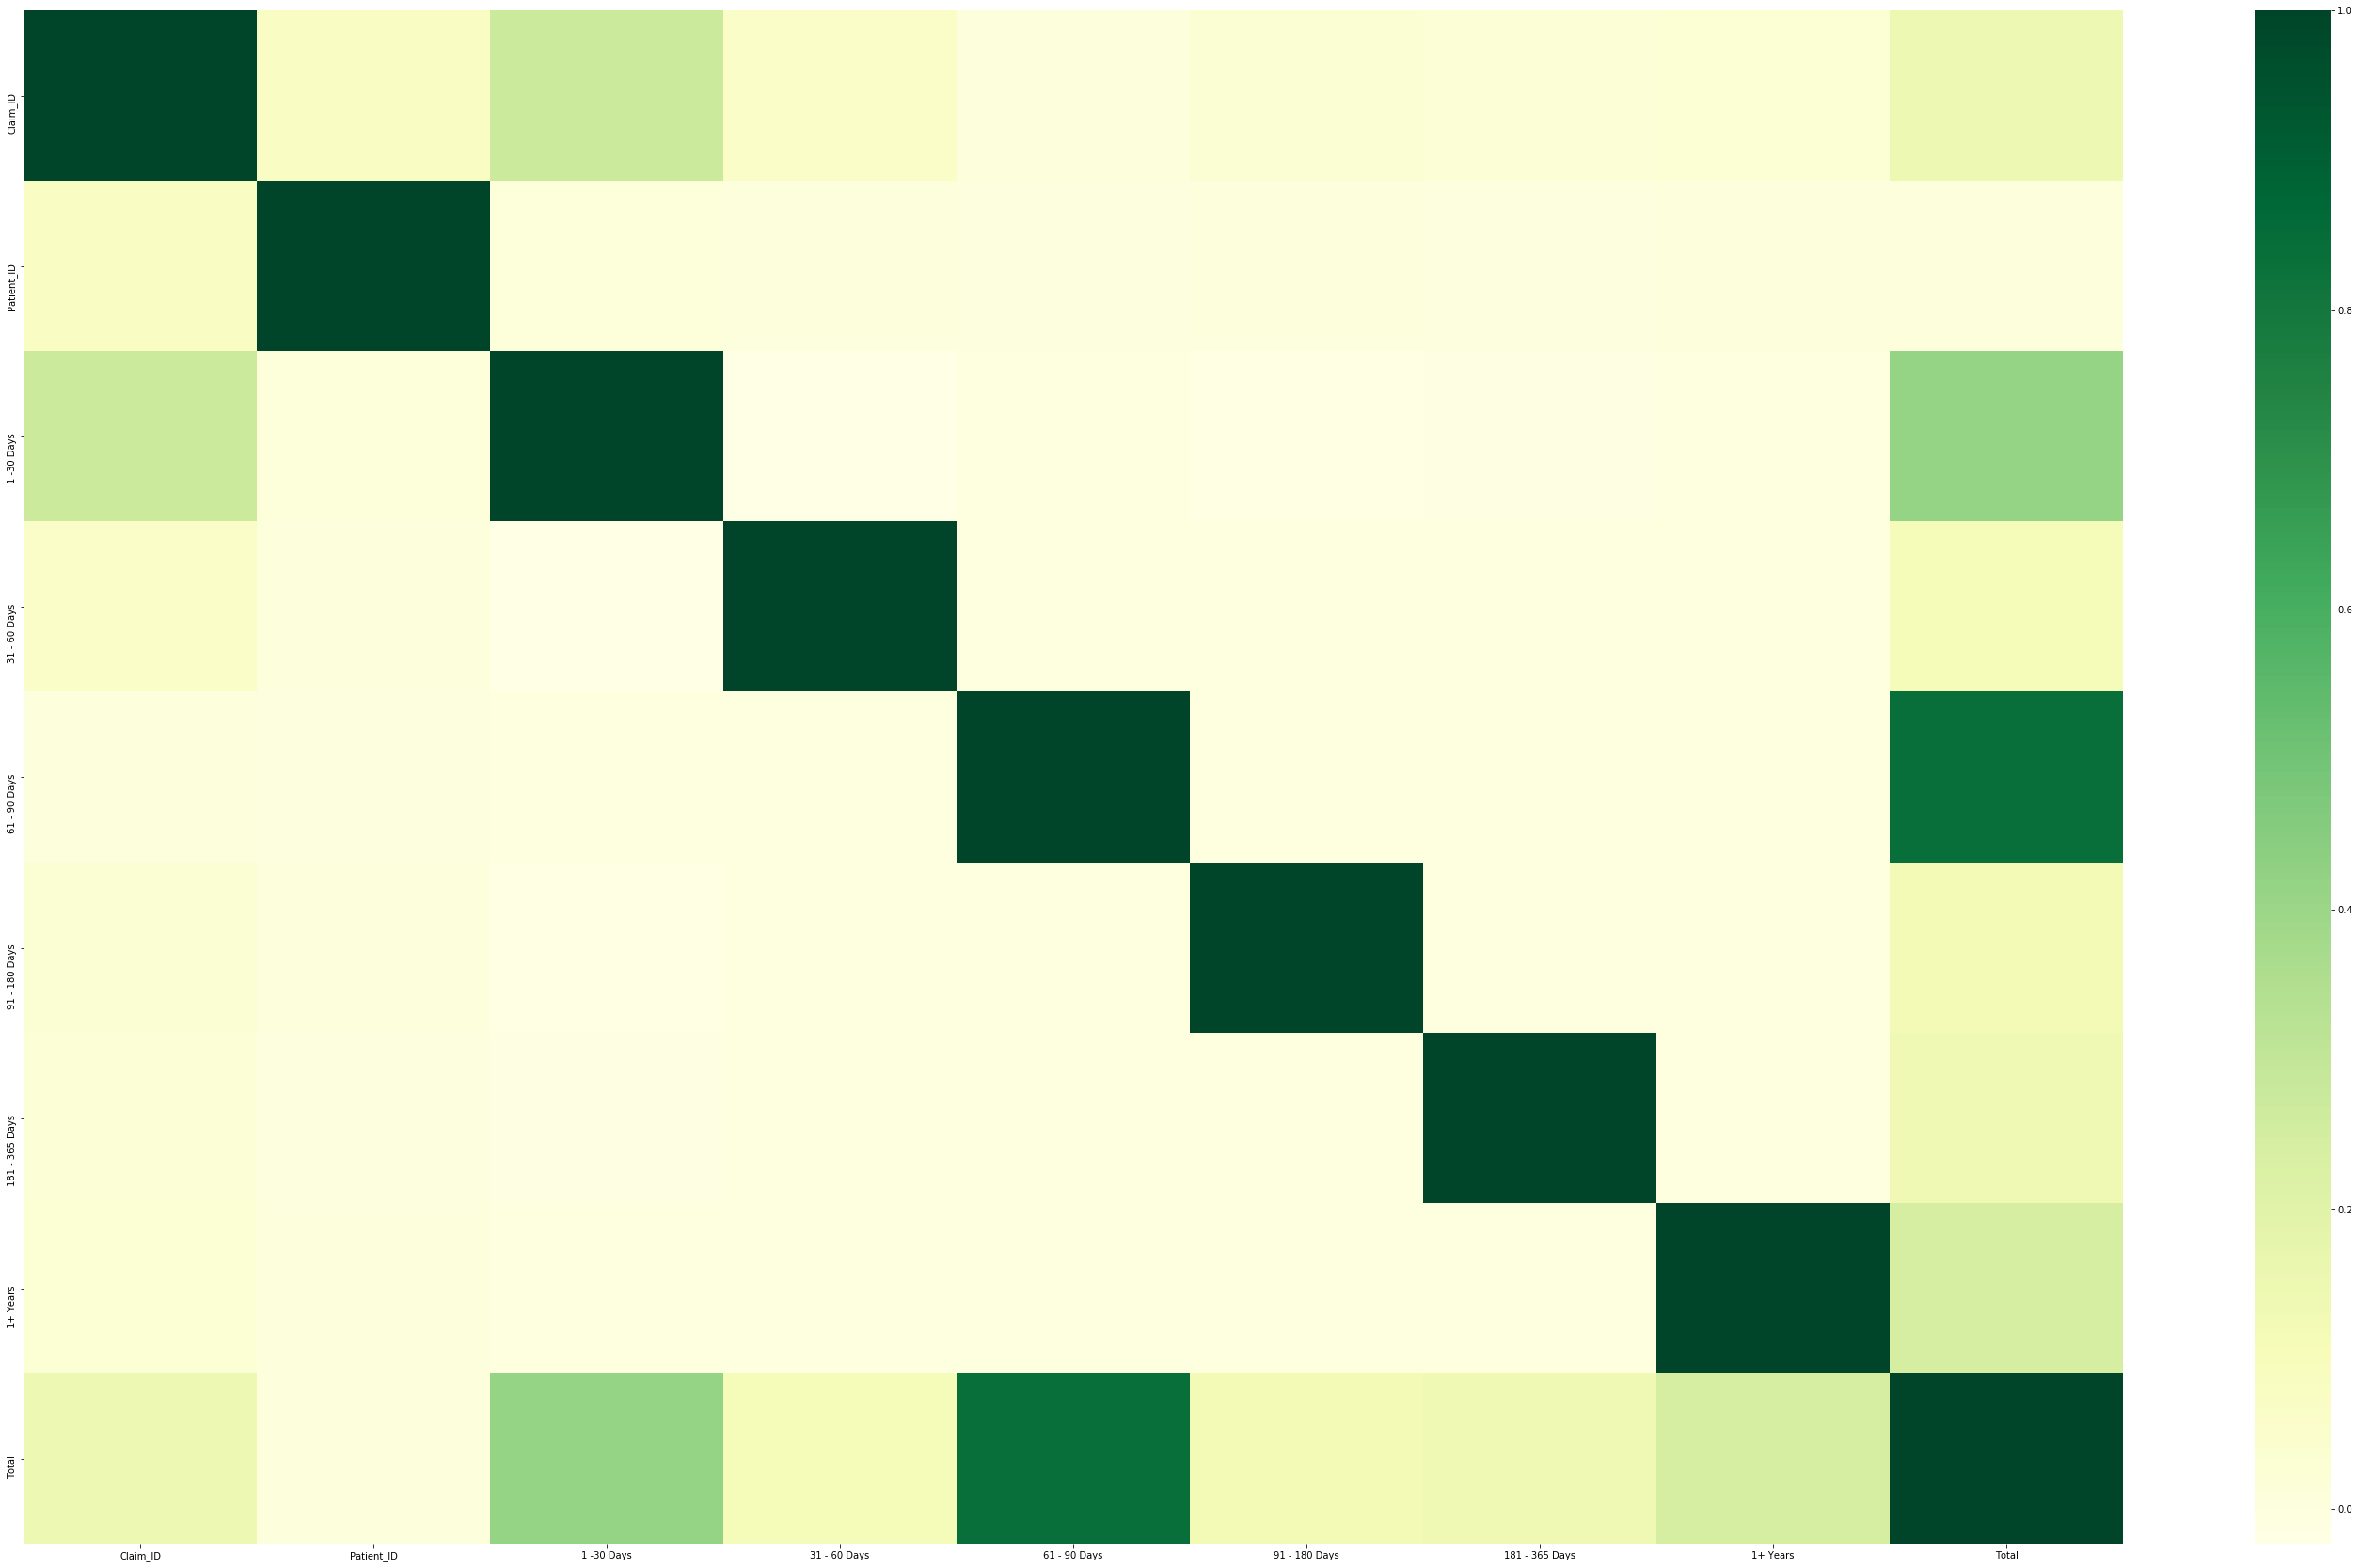

In [37]:
# importsome more packages/libraries
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(50,30)) 
# play with the figsize until the plot is big enough to plot all the columns
# of your dataset, or the way you desire it to look like otherwise

#sns.heatmap(data.corr())

# plot a heatmap to find out co relation matrix of clumns in the dataframe
sns.heatmap(df.corr(), cmap='YlGn')
plt.show()
fig.savefig("Correlation.png")

In [38]:
df.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Claim_ID,Patient_ID,1 -30 Days,31 - 60 Days,61 - 90 Days,91 - 180 Days,181 - 365 Days,1+ Years,Total
Claim_ID,1.0,0.074,0.28,0.062,0.0045,0.035,0.022,0.031,0.14
Patient_ID,0.074,1.0,0.0098,0.0061,0.00056,0.0051,0.0037,0.0054,0.008
1 -30 Days,0.28,0.0098,1.0,-0.024,-0.0018,-0.016,-0.015,-0.0015,0.42
31 - 60 Days,0.062,0.0061,-0.024,1.0,-0.00044,-0.0039,-0.0036,-0.00035,0.12
61 - 90 Days,0.0045,0.00056,-0.0018,-0.00044,1.0,-0.0003,-0.00028,-2.7e-05,0.84
91 - 180 Days,0.035,0.0051,-0.016,-0.0039,-0.0003,1.0,-0.0025,-0.00024,0.12
181 - 365 Days,0.022,0.0037,-0.015,-0.0036,-0.00028,-0.0025,1.0,-0.00022,0.13
1+ Years,0.031,0.0054,-0.0015,-0.00035,-2.7e-05,-0.00024,-0.00022,1.0,0.25
Total,0.14,0.008,0.42,0.12,0.84,0.12,0.13,0.25,1.0


In [39]:
df_Updated = df[df['Claim_Service_Day'] >= '9/1/2017']

In [40]:
#df_Updated.to_csv('../AR_Raw_Data/Updated_AR_Data_Custom_Buckets.csv',index=False)

In [41]:
df_Updated.head()

,Claim_ID,Claim_Service_Day,Service_Dept,Service_Dept_Name,Patient_ID,Primary_Claim_Custom_Insurance_Grouping,Primary_Claim_Insurance_Package_Name,Rendering_Provider,rndrng prvdr prvdr grp,Physician,Proc_Classification,Aging_Date,Transfer_Intent,Transfer Type,1 -30 Days,31 - 60 Days,61 - 90 Days,91 - 180 Days,181 - 365 Days,1+ Years,Total,Transaction Charge Type
305,74993,9/14/2009,Millburn - Union,"Associated Retinal Consultants, LLC",370218,*MEDICARE B,Medicare-NJ (Medicare),RANJ_CSeery,Retina Associates of New Jersey,"SEERY, CHRISTOPHER",Drug,7/20/2010,Secondary,Secondary,0.0,0.0,0.0,0.0,0.0,407.79,407.79,TRANSFERIN
306,74993,9/14/2009,Millburn - Union,"Associated Retinal Consultants, LLC",370218,*MEDICARE B,Medicare-NJ (Medicare),RANJ_CSeery,Retina Associates of New Jersey,"SEERY, CHRISTOPHER",Drug,9/29/2009,Secondary,Secondary,0.0,0.0,0.0,0.0,0.0,407.79,407.79,TRANSFERIN
307,74993,9/14/2009,Millburn - Union,"Associated Retinal Consultants, LLC",370218,*MEDICARE B,Medicare-NJ (Medicare),RANJ_CSeery,Retina Associates of New Jersey,"SEERY, CHRISTOPHER",Drug,10/7/2009,Secondary,Secondary,0.0,0.0,0.0,0.0,0.0,-407.79,-407.79,TRANSFERIN
308,74993,9/14/2009,Millburn - Union,"Associated Retinal Consultants, LLC",370218,*MEDICARE B,Medicare-NJ (Medicare),RANJ_CSeery,Retina Associates of New Jersey,"SEERY, CHRISTOPHER",Drug,10/14/2009,Secondary,Secondary,0.0,0.0,0.0,0.0,0.0,-407.79,-407.79,TRANSFERIN
309,74993,9/14/2009,Millburn - Union,"Associated Retinal Consultants, LLC",370218,*MEDICARE B,Medicare-NJ (Medicare),RANJ_CSeery,Retina Associates of New Jersey,"SEERY, CHRISTOPHER",Non-Drug,7/20/2010,Secondary,Secondary,0.0,0.0,0.0,0.0,0.0,41.00,41.00,TRANSFERIN


In [42]:
df.Service_Dept_Name.unique()

array(['Associated Retinal Consultants, LLC',
       'Associated Retinal Consultants', 'ASSOCIATED RETINAL CONSULTANT',
       'ASSOCIATED RETINAL CONSULTANTS', 'KESSLER INPATIENT',
       'ASSOCIATED RETINAL CONSULTANTS LLC',
       'Associate Retinal Consultants'], dtype=object)

## we can see that Associated Retinal Consutants have different formats. Need to club then into single before grouping them

In [43]:
df.loc[df['Service_Dept_Name'].str.startswith('A'), 'Service_Dept_Name'] = 'Associated Retinal Consultants, LLC'

In [44]:
df_Dept['Date'] =pd.PeriodIndex(df_Dept.Aging_Date, freq='M').strftime('%b-%Y')

In [45]:
df_Dept= df.groupby(['Date','Service_Dept_Name'],as_index=False).sum().sort_values(['Total'],ascending=False)

KeyError: 'Date'

In [ ]:
df_Dept

In [ ]:
df_Dept.drop(['Claim_ID','Patient_ID'],inplace=True,axis=1)

In [ ]:
df_Dept

In [ ]:

df_Dept_Count=df_Dept['Date'].value_counts().reset_index()
df_Dept_Count.columns = ['Date', 'AR_Days']

In [ ]:
df_Dept

In [ ]:
#df_Dept.loc['Top Customers']= df_Dept.sum()

In [ ]:
import numpy as np
total = df_Dept.apply(np.sum)
total['Service_Dept_Name'] = 'Top Departments'
df_Dept_New= df_Dept.append(pd.DataFrame( total.values, index=total.keys()).T, ignore_index=False, sort=False)

In [ ]:
#df_Dept

In [ ]:
#df_Dept.append(df_Dept.sum(numeric_only=True), ignore_index=True)

In [ ]:
df_Dept_New

In [ ]:
#df_Dept.Department = df_Dept.Department.fillna('Top Customers')

In [ ]:
df_Dept_New.to_csv('../AR_Raw_Data/Accounts_Receivable-by_Serv_Dept_as-of_Oct2018.csv',index=False)

In [ ]:
df_Physician= df.groupby(['Physician'],as_index=False).sum().sort_values(['Total'],ascending=False)

In [ ]:
df_Physician

In [ ]:
df_Physician.drop(['Claim_ID','Patient_ID'],inplace=True,axis=1)

In [ ]:
total_p = df_Physician.apply(np.sum)
total_p['Physician'] = 'Total'
df_Physician_New= df_Physician.append(pd.DataFrame(total_p.values, index=total_p.keys()).T, ignore_index=True)

In [ ]:
df_Physician_New

In [ ]:
df_Physician_New.to_csv('../AR_Raw_Data/Accounts_Receivable-by_Physician__as-of_Oct2018.csv',index=False)